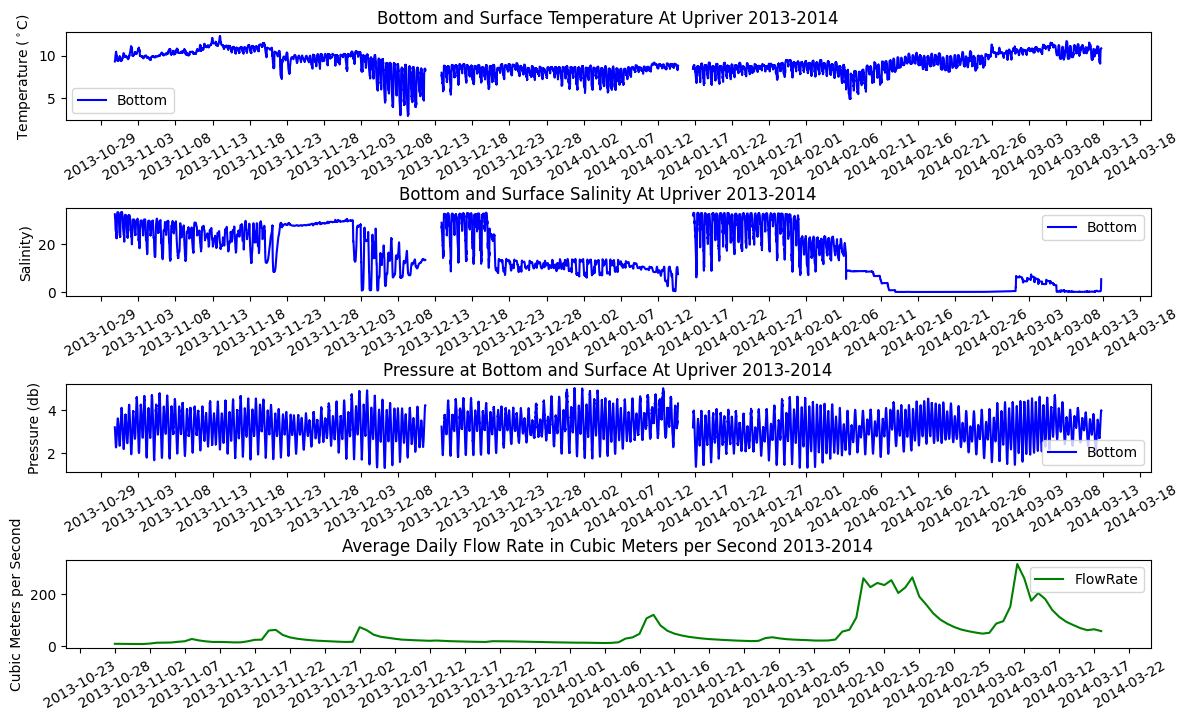

In [1]:
import pandas as pd
import scipy.io as sio
import numpy as np
import datetime
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
from matplotlib.figure import Figure

#import upriver bottom data
matDataD1 = sio.loadmat('2013_14\\mcat_dnriver_6865_Dep1.mat')
matDataD2 = sio.loadmat('2013_14\\mcat_dnriver_7162_Dep2.mat')
matDataD3 = sio.loadmat('2013_14\\mcat_dnriver_6865_Dep3.mat')

#mat lab date origin
origin = np.datetime64('0000-01-01', 'D') - np.timedelta64(1, 'D')

matDataD1Filtered = {dictKey:dictValue for dictKey, dictValue in matDataD1.items() if dictKey[0] != '_'}
matD1DF = pd.DataFrame({dictKey: np.array(dictValue).flatten() for dictKey, dictValue in matDataD1Filtered.items()})
matDataD2Filtered = {dictKey:dictValue for dictKey, dictValue in matDataD2.items() if dictKey[0] != '_'}
matD2DF = pd.DataFrame({dictKey: np.array(dictValue).flatten() for dictKey, dictValue in matDataD2Filtered.items()})
matDataD3Filtered = {dictKey:dictValue for dictKey, dictValue in matDataD3.items() if dictKey[0] != '_'}
matD3DF = pd.DataFrame({dictKey: np.array(dictValue).flatten() for dictKey, dictValue in matDataD3Filtered.items()})

matDDBF = pd.concat([matD1DF, matD2DF, matD3DF])
tmsDownriver = matDDBF['DN'] * np.timedelta64(1, 'D') + origin

#reading in flow data
flowDF = pd.read_csv('2013_2014alsea.csv')
flowDF['fRate'] = flowDF['max_va'] * 0.0283168
#create a new column for flow dates
for index, row in flowDF.iterrows():
    calcDate = pd.Timestamp(year=int(row['begin_yr']), month=int(row['month_nu']), day=int(row['day_nu']))
    flowDF.loc[index, 'DN'] = calcDate

tmsFlow = flowDF['DN']

#create the subplots
fig, (axtemp, axsal, axro, axflow) = plt.subplots(4,figsize=(14, 8))

#set the titles for the plots
axtemp.set_title("Bottom and Surface Temperature At Upriver 2013-2014")
axsal.set_title("Bottom and Surface Salinity At Upriver 2013-2014")
axro.set_title("Pressure at Bottom and Surface At Upriver 2013-2014")
axflow.set_title("Average Daily Flow Rate in Cubic Meters per Second 2013-2014")

#set up the y axis for each plot
plt.setp(axtemp, ylabel = "Temperature ($^\circ$C)")
plt.setp(axsal, ylabel = "Salinity)")
plt.setp(axro, ylabel = "Pressure (db)")
plt.setp(axflow, ylabel = "Cubic Meters per Second")

#plot the data on the proper plot

axtemp.plot(tmsDownriver, matDDBF['T'], color = 'blue', label='Bottom')
# also do this for surface 
axsal.plot(tmsDownriver,matDDBF['S'],color = 'blue', label = "Bottom")
#do this for surface
axro.plot(tmsDownriver, matDDBF['P'], color = 'blue', label = "Bottom")
#do this for surface
axflow.plot(tmsFlow,flowDF['fRate'], color = 'green', label = 'FlowRate')


# Change the tick interval
axtemp.xaxis.set_major_locator(mdates.DayLocator(interval=5)) 
axsal.xaxis.set_major_locator(mdates.DayLocator(interval=5))
axro.xaxis.set_major_locator(mdates.DayLocator(interval=5))
axflow.xaxis.set_major_locator(mdates.DayLocator(interval=5))

# Puts x-axis labels on an angle
axtemp.xaxis.set_tick_params(rotation = 30)  
axro.xaxis.set_tick_params(rotation = 30)
axsal.xaxis.set_tick_params(rotation = 30)
axflow.xaxis.set_tick_params(rotation = 30)

#adjust space between the plots
plt.subplots_adjust(hspace=1)

axtemp.legend() 
axsal.legend()
axro.legend()
axflow.legend()
plt.show()

